# Clinical data

**MedInfo 1 ANSWERS**

1.	There are 1171 patients in the dataset

2.	1000 patients are alive

3.	609 patients are female

4.	When removing the NaN in DEATHDATE the new age mean is 38.85 and new std is 23.52

5.	Top 5 most frequent conditions in the dataset are in order :
Viral sinusitis (disorder), Acute viral pharyngitis (disorder), Acute bronchitis (disorder), Normal pregnancy, Body mass index 30+ - obesity (finding)
Top 5 most prevalent conditions are in order :
Viral sinusitis (disorder), Acute viral pharyngitis (disorder), Acute bronchitis (disorder), Body mass index 30+ - obesity (finding), Prediabetes

6.	The maximum number of distinct conditions recorded for a single patient is 22 for patient 3f336702-bf73-4fc8-bd59-3ba77fd65d0d

7.	Top 10 most prevalent conditions after 65 years old are in order:
Viral sinusitis (disorder), Acute viral pharyngitis (disorder), Acute bronchitis (disorder), Chronic congestive heart failure (disorder), Osteoporosis (disorder), Polyp of colon, Alzheimer's disease (disorder), Stroke, Fracture of forearm, Hyperlipidemia

8.	The main difficulties to consider are that:
- conditions will overlap, potentially masking important informations
- data collection can vary between patients, especially between young and old people, with young people being more diagnosed and having more health data stored
- the same disease can appear multiple times, sometimes under different classifications
- It's hard to know when a disease is healed because the patient won't come back

9.	Observations measured for all patients (1171):
Body Height                                                                 
Body Weight                                                                 
Diastolic Blood Pressure                                                    
Erythrocyte distribution width [Entitic volume] by Automated count          
Erythrocytes [#/volume] in Blood by Automated count                         
Heart rate                                                                  
Hematocrit [Volume Fraction] of Blood by Automated count                    
Hemoglobin [Mass/volume] in Blood                                           
Leukocytes [#/volume] in Blood by Automated count                           
MCH [Entitic mass] by Automated count                                       
MCHC [Mass/volume] by Automated count                                       
MCV [Entitic volume] by Automated count                                     
Pain severity - 0-10 verbal numeric rating [Score] - Reported              
Platelet distribution width [Entitic volume] in Blood by Automated count   
Platelet mean volume [Entitic volume] in Blood by Automated count
Platelets [#/volume] in Blood by Automated count                 
Respiratory rate                                                   
Systolic Blood Pressure                                              
Tobacco smoking status NHIS

10.	See graph

11.	The 4 first medications make sens, you can have 1, 2 or 3 anti-hypertensors depending on your case (diuretic, beta-blocker, sartan)

These are reimbursement data, we don't actually know if the patient took the medication, and for how long in reality

Some medications are overrepresented in hypertensed patients but that doesn't mean they are used to treat hypertension (ex: insulin for diabetes), it means they are used to cure diseases often found in these patients (share risk factors or causal link with hypertension)

To solve these problems we should filter for specific medications used to treat hypertension (ex: remove insulin)

We could also try to merge medication that only differ in posology or administration (ex: 12.5 versus 25 MG)


Today, you are going to work with **synthetic** clinical data from https://synthetichealth.github.io/synthea/#technology-landing.

Goal: Explore and analyze synthetic patient health data

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Patient demography analysis

In [4]:
patients = pd.read_csv("Data/patients.csv")
patients.head(5)


,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989-05-25,NaN,999-76-6866,S99984236,X19277260X,Mr.,José Eduardo181,Gómez206,NaN,...,Marigot Saint Andrew Parish DM,427 Balistreri Way Unit 19,Chicopee,Massachusetts,Hampden County,1013.0,42.228354,-72.562951,271227.08,1334.88
1,034e9e3b-2def-4559-bb2a-7850888ae060,1983-11-14,NaN,999-73-5361,S99962402,X88275464X,Mr.,Milo271,Feil794,NaN,...,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531,793946.01,3204.49
2,10339b10-3cd1-4ac3-ac13-ec26728cb592,1992-06-02,NaN,999-27-3385,S99972682,X73754411X,Mr.,Jayson808,Fadel536,NaN,...,Springfield Massachusetts US,1056 Harris Lane Suite 70,Chicopee,Massachusetts,Hampden County,1020.0,42.181642,-72.608842,574111.90,2606.40
3,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,1978-05-27,NaN,999-85-4926,S99974448,X40915583X,Mrs.,Mariana775,Rutherford999,NaN,...,Yarmouth Massachusetts US,999 Kuhn Forge,Lowell,Massachusetts,Middlesex County,1851.0,42.636143,-71.343255,935630.30,8756.19
4,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,1996-10-18,NaN,999-60-7372,S99915787,X86772962X,Mr.,Gregorio366,Auer97,NaN,...,Patras Achaea GR,1050 Lindgren Extension Apt 38,Boston,Massachusetts,Suffolk County,2135.0,42.352434,-71.028610,598763.07,3772.20


In [5]:
for col in patients.columns:
    print(col)

Id
BIRTHDATE
DEATHDATE
SSN
DRIVERS
PASSPORT
PREFIX
FIRST
LAST
SUFFIX
MAIDEN
MARITAL
RACE
ETHNICITY
GENDER
BIRTHPLACE
ADDRESS
CITY
STATE
COUNTY
ZIP
LAT
LON
HEALTHCARE_EXPENSES
HEALTHCARE_COVERAGE


In [6]:
# Distribution of patient's race
patients.groupby("RACE").Id.nunique()

,Id
RACE,
asian,90
black,101
native,13
other,2
white,965


__Question1__: How many patients are in this dataset? \
__Question2__: How many are still alive? \
__Question3__: How many female are in this dataset?

In [7]:
patients.shape

(1171, 25)

In [8]:
print(patients['DEATHDATE'].isna().sum())


1000


In [9]:
patients.groupby("GENDER").Id.nunique()

,Id
GENDER,
F,609
M,562


<Axes: xlabel='AGE', ylabel='Count'>

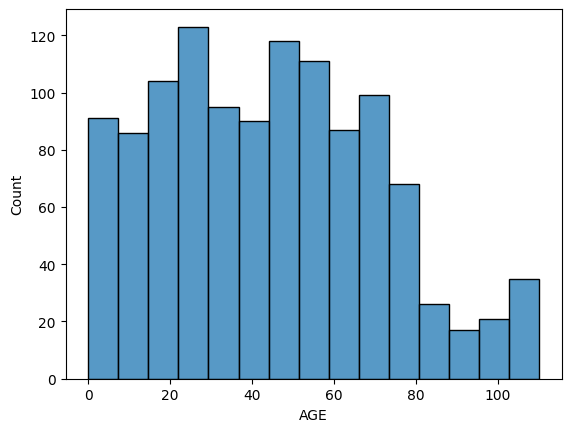

In [10]:
#The dataset gathers patient information until april 2020. Let's calculate the age based on BIRTHDATE.
current_date = pd.to_datetime("2020-05-01")
patients['BIRTHDATE'] = pd.to_datetime(patients['BIRTHDATE'])
patients['AGE'] = (current_date - patients['BIRTHDATE']).dt.days // 365

sns.histplot(data=patients, x="AGE")

In [11]:
# Summary statistics for age
print("Age Summary:")
print(patients['AGE'].describe())

Age Summary:
count    1171.000000
mean       44.243382
std        26.761077
min         0.000000
25%        22.000000
50%        43.000000
75%        63.000000
max       110.000000
Name: AGE, dtype: float64


__Question4__: correct the previous distribution by removing dead patients, what is the new mean and standard deviation of age distribution ?

Age Summary:
count    1000.000000
mean       38.855000
std        23.516994
min         0.000000
25%        20.000000
50%        38.000000
75%        56.000000
max       110.000000
Name: AGE, dtype: float64


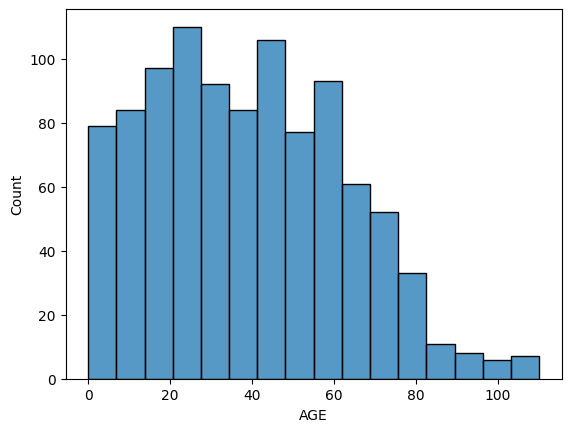

In [12]:
patients_alive = patients[patients['DEATHDATE'].isna()]
sns.histplot(data=patients_alive, x="AGE")

print("Age Summary:")
print(patients_alive['AGE'].describe())

count    1171.000000
mean       41.178480
std        24.363411
min         0.000000
25%        21.000000
50%        41.000000
75%        60.000000
max       110.000000
Name: AGE, dtype: float64


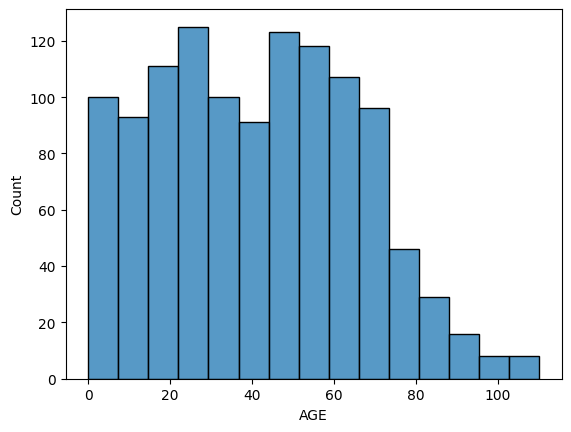

In [13]:
#instead of removing the dead patients, let's replace the current data by their deathdate
patients.loc[~patients["DEATHDATE"].isna(), 'AGE'] = (pd.to_datetime(patients.loc[~patients["DEATHDATE"].isna(), 'DEATHDATE']) - patients.loc[~patients["DEATHDATE"].isna(), 'BIRTHDATE']).dt.days // 365
sns.histplot(data=patients, x="AGE")
print(patients['AGE'].describe())

# 2. Reported conditions analysis

In [14]:
conditions = pd.read_csv("Data/conditions.csv")
conditions.head(5)

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,2001-05-01,NaN,1d604da9-9a81-4ba9-80c2-de3375d59b40,8f104aa7-4ca9-4473-885a-bba2437df588,40055000,Chronic sinusitis (disorder)
1,2011-08-09,2011-08-16,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,9d35ec9f-352a-4629-92ef-38eae38437e7,444814009,Viral sinusitis (disorder)
2,2011-11-16,2011-11-26,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,ae7555a9-eaff-4c09-98a7-21bc6ed1b1fd,195662009,Acute viral pharyngitis (disorder)
3,2011-05-13,2011-05-27,10339b10-3cd1-4ac3-ac13-ec26728cb592,e1ab4933-07a1-49f0-b4bd-05500919061d,10509002,Acute bronchitis (disorder)
4,2011-02-06,2011-02-14,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,b8f76eba-7795-4dcd-a544-f27ac2ef3d46,195662009,Acute viral pharyngitis (disorder)


In [15]:
#Number of unique conditions present in this dataset
conditions.CODE.nunique()

129

__Question5__: What are the top 5 most frequent medical conditions in the dataset? What is the top 5 most prevalent conditions?\
__Question6__: What is the maximum number of distinct conditions recorded for a single patient in this dataset?

In [16]:
conditions.groupby("DESCRIPTION").ENCOUNTER.nunique().sort_values(ascending=False)


,ENCOUNTER
DESCRIPTION,
Viral sinusitis (disorder),1248
Acute viral pharyngitis (disorder),653
Acute bronchitis (disorder),563
Normal pregnancy,516
Body mass index 30+ - obesity (finding),449
...,...
Proliferative diabetic retinopathy due to type II diabetes mellitus (disorder),1
Pyelonephritis,1
Primary malignant neoplasm of colon,1


In [17]:
conditions.groupby("DESCRIPTION").PATIENT.nunique().sort_values(ascending=False)


,PATIENT
DESCRIPTION,
Viral sinusitis (disorder),743
Acute viral pharyngitis (disorder),492
Acute bronchitis (disorder),464
Body mass index 30+ - obesity (finding),449
Prediabetes,317
...,...
Proliferative diabetic retinopathy due to type II diabetes mellitus (disorder),1
Pyelonephritis,1
Primary malignant neoplasm of colon,1


In [18]:
conditions.groupby("PATIENT").DESCRIPTION.nunique().sort_values(ascending=False)


,DESCRIPTION
PATIENT,
3f336702-bf73-4fc8-bd59-3ba77fd65d0d,22
6ec18ddf-e9ee-421a-9033-456f558c7b4b,21
59cf17d9-6c13-4333-a1cb-cc5fdf63366d,20
2c71dd97-7085-416a-aa07-d675bbe3adf2,20
5c06120a-9af5-4204-951b-7a8bfc465df3,19
...,...
c67349f9-19e4-4f79-9203-55540b153492,1
f874e5d6-8e2e-453d-b054-a3b5770c4cdc,1
f6f561cc-1e0a-4f36-80c9-4b734d4b1a2e,1


In [19]:
#Let's merge patients information with their conditions
merged_cond = pd.merge(conditions, patients[['Id', 'GENDER','BIRTHDATE']], left_on='PATIENT', right_on='Id')
merged_cond["START"] = pd.to_datetime(merged_cond["START"], utc=True).dt.tz_localize(None) #Convert into date and remove timezone information
merged_cond["STOP"] = pd.to_datetime(merged_cond["STOP"], utc=True).dt.tz_localize(None) #Convert into date and remove timezone information


# Count conditions by gender
top_condition_gender = merged_cond.groupby(['GENDER', 'DESCRIPTION'])["Id"].nunique().reset_index(name='count')
top_condition_gender.sort_values("count", ascending=False)[:20]

,GENDER,DESCRIPTION,count
113,F,Viral sinusitis (disorder),407
228,M,Viral sinusitis (disorder),336
12,F,Body mass index 30+ - obesity (finding),250
118,M,Acute viral pharyngitis (disorder),248
3,F,Acute viral pharyngitis (disorder),244
117,M,Acute bronchitis (disorder),241
2,F,Acute bronchitis (disorder),223
73,F,Miscarriage in first trimester,221
79,F,Normal pregnancy,205
126,M,Body mass index 30+ - obesity (finding),199


In [20]:
# Let's dive into age-specific conditions

#Calculate the age at diagnosis
merged_cond["age_at_diagnosis"] = (pd.to_datetime(merged_cond["START"])- merged_cond["BIRTHDATE"]).dt.days // 365

merged_cond


,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,Id,GENDER,BIRTHDATE,age_at_diagnosis
0,2001-05-01,NaT,1d604da9-9a81-4ba9-80c2-de3375d59b40,8f104aa7-4ca9-4473-885a-bba2437df588,40055000,Chronic sinusitis (disorder),1d604da9-9a81-4ba9-80c2-de3375d59b40,M,1989-05-25,11
1,2011-08-09,2011-08-16,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,9d35ec9f-352a-4629-92ef-38eae38437e7,444814009,Viral sinusitis (disorder),8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,F,1978-05-27,33
2,2011-11-16,2011-11-26,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,ae7555a9-eaff-4c09-98a7-21bc6ed1b1fd,195662009,Acute viral pharyngitis (disorder),8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,F,1978-05-27,33
3,2011-05-13,2011-05-27,10339b10-3cd1-4ac3-ac13-ec26728cb592,e1ab4933-07a1-49f0-b4bd-05500919061d,10509002,Acute bronchitis (disorder),10339b10-3cd1-4ac3-ac13-ec26728cb592,M,1992-06-02,18
4,2011-02-06,2011-02-14,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,b8f76eba-7795-4dcd-a544-f27ac2ef3d46,195662009,Acute viral pharyngitis (disorder),f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,M,1996-10-18,14
...,...,...,...,...,...,...,...,...,...,...
8371,1984-12-29,NaT,fc817953-cc8b-45db-9c85-7c0ced8fa90d,87cfa8a4-126e-4c58-a839-e8b725828d0f,64859006,Osteoporosis (disorder),fc817953-cc8b-45db-9c85-7c0ced8fa90d,F,1914-09-05,70
8372,1988-08-24,NaT,fc817953-cc8b-45db-9c85-7c0ced8fa90d,97c0226c-92b4-4e78-b81f-4225d8473ba3,40055000,Chronic sinusitis (disorder),fc817953-cc8b-45db-9c85-7c0ced8fa90d,F,1914-09-05,74
8373,2009-08-08,NaT,fc817953-cc8b-45db-9c85-7c0ced8fa90d,1c91f459-adf0-4fe6-abdb-d248a91b9d85,230690007,Stroke,fc817953-cc8b-45db-9c85-7c0ced8fa90d,F,1914-09-05,94
8374,2010-11-18,2010-11-25,fc817953-cc8b-45db-9c85-7c0ced8fa90d,8aabb13d-f4ac-4037-95ab-00e0e48a1b34,444814009,Viral sinusitis (disorder),fc817953-cc8b-45db-9c85-7c0ced8fa90d,F,1914-09-05,96


__Question7__: What are the top 10 conditions after 65y?

In [21]:
merged_cond[merged_cond["age_at_diagnosis"] >= 65].groupby("DESCRIPTION")["PATIENT"].nunique().sort_values(ascending=False).head(10)


,PATIENT
DESCRIPTION,
Viral sinusitis (disorder),114
Acute viral pharyngitis (disorder),72
Acute bronchitis (disorder),65
Chronic congestive heart failure (disorder),33
Osteoporosis (disorder),31
Polyp of colon,29
Alzheimer's disease (disorder),25
Stroke,22
Fracture of forearm,20


<Axes: xlabel='age_at_diagnosis', ylabel='Density'>

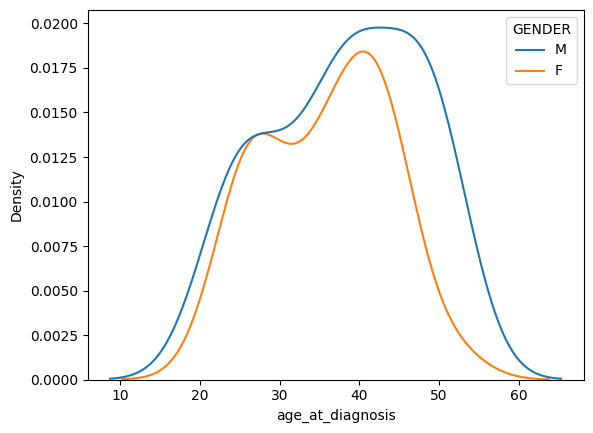

In [22]:
## Let's visualize a specific condition across age
diabetes = merged_cond[merged_cond["DESCRIPTION"] == "Diabetes"]
sns.kdeplot(data=diabetes, x ="age_at_diagnosis", hue="GENDER")

/tmp/ipython-input-3847034100.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  toplot = merged_cond.groupby(['PATIENT', 'age_bin'])["CODE"].size().unstack(fill_value=0)


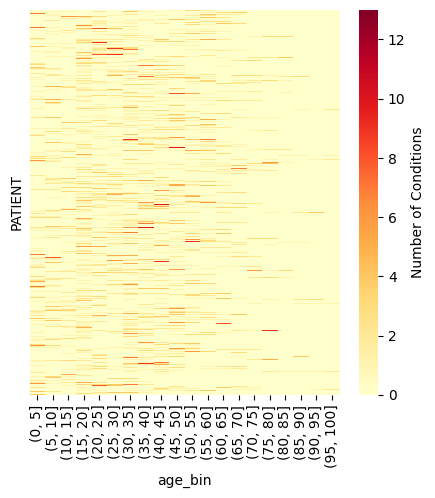

In [23]:
# Let's visualize the density of conditions across age per patient
merged_cond['age_bin'] = pd.cut(merged_cond['age_at_diagnosis'], bins=range(0,101,5))  # 0-100 in 5-year bins
# Count occurrences of each condition per age bin
toplot = merged_cond.groupby(['PATIENT', 'age_bin'])["CODE"].size().unstack(fill_value=0)
#visualize
plt.figure(figsize=(5,5))
ax = sns.heatmap(
    toplot,
    cmap="YlOrRd",
        cbar_kws={'label': 'Number of Conditions'},
    # linewidths=0.5,
    # linecolor='gray'
)
ax.set_yticks([])
plt.show()

__Question8__: Seeing this heatmap, what do you think are the main difficulties when considering the temporal context of medical conditions in longitudinal health data?

# 3. Reported observation analysis

In [24]:
observations = pd.read_csv("Data/observations.csv")
observations["DATE"] = pd.to_datetime(observations["DATE"], utc=True).dt.tz_localize(None) #Convert into date and remove timezone information
observations.head(5)


,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,VALUE,UNITS,TYPE
0,2012-01-23 17:45:28,034e9e3b-2def-4559-bb2a-7850888ae060,e88bc3a9-007c-405e-aabc-792a38f4aa2b,8302-2,Body Height,193.3,cm,numeric
1,2012-01-23 17:45:28,034e9e3b-2def-4559-bb2a-7850888ae060,e88bc3a9-007c-405e-aabc-792a38f4aa2b,72514-3,Pain severity - 0-10 verbal numeric rating [Sc...,2.0,{score},numeric
2,2012-01-23 17:45:28,034e9e3b-2def-4559-bb2a-7850888ae060,e88bc3a9-007c-405e-aabc-792a38f4aa2b,29463-7,Body Weight,87.8,kg,numeric
3,2012-01-23 17:45:28,034e9e3b-2def-4559-bb2a-7850888ae060,e88bc3a9-007c-405e-aabc-792a38f4aa2b,39156-5,Body Mass Index,23.5,kg/m2,numeric
4,2012-01-23 17:45:28,034e9e3b-2def-4559-bb2a-7850888ae060,e88bc3a9-007c-405e-aabc-792a38f4aa2b,8462-4,Diastolic Blood Pressure,82.0,mm[Hg],numeric


In [25]:
observations.shape

(299697, 8)

__Question9__: Which observations have been measured for all patients in this dataset?

In [26]:
# Count how many unique patients there are total
total_patients = observations['PATIENT'].nunique()

# Count how many patients have each observation type
obs_patient_counts = observations.groupby('DESCRIPTION')['PATIENT'].nunique()

# Find observations measured for ALL patients
universal_obs = obs_patient_counts[obs_patient_counts == total_patients]

print(f"Total patients: {total_patients}")
print(f"\nObservations measured for ALL patients:")
print(universal_obs)

Total patients: 1171

Observations measured for ALL patients:
DESCRIPTION
Body Height                                                                 1171
Body Weight                                                                 1171
Diastolic Blood Pressure                                                    1171
Erythrocyte distribution width [Entitic volume] by Automated count          1171
Erythrocytes [#/volume] in Blood by Automated count                         1171
Heart rate                                                                  1171
Hematocrit [Volume Fraction] of Blood by Automated count                    1171
Hemoglobin [Mass/volume] in Blood                                           1171
Leukocytes [#/volume] in Blood by Automated count                           1171
MCH [Entitic mass] by Automated count                                       1171
MCHC [Mass/volume] by Automated count                                       1171
MCV [Entitic volume] by Automated c

In [27]:
# Show what percentage of patients have each observation
obs_coverage = (observations.groupby('DESCRIPTION')['PATIENT'].nunique() / total_patients * 100).sort_values(ascending=False)

print("\nObservation coverage across patients:")
print(obs_coverage)


Observation coverage across patients:
DESCRIPTION
Body Weight                                                                    100.000000
Respiratory rate                                                               100.000000
Body Height                                                                    100.000000
Diastolic Blood Pressure                                                       100.000000
Hemoglobin [Mass/volume] in Blood                                              100.000000
                                                                                  ...    
Lymph nodes with macrometastases [#] in Cancer specimen by Light microscopy      0.341588
Weight difference [Mass difference] --pre dialysis - post dialysis               0.256191
Lymph nodes with micrometastases [#] in Cancer specimen by Light microscopy      0.170794
Mental health Outpatient Note                                                    0.085397
Tumor marker Cancer                              

__Question10__: Visualize the *Heart rate* distribution across ages ? (Hint merge the table *observations* with the table *patients*, don't forget to convert the value into a float)

/tmp/ipython-input-704119000.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_rate['VALUE'] = pd.to_numeric(heart_rate['VALUE'], errors='coerce')


Text(0.5, 1.0, 'Distribution of Ages with Heart Rate Measurements')

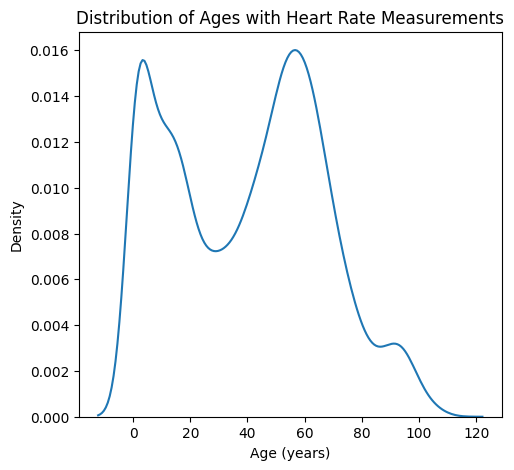

In [28]:
merged = observations.merge(patients[['Id', 'BIRTHDATE']],
                           left_on='PATIENT',
                           right_on='Id',
                           how='left')

# age at observation
merged['DATE'] = pd.to_datetime(merged['DATE'])
merged['BIRTHDATE'] = pd.to_datetime(merged['BIRTHDATE'])
merged['AGE'] = (merged['DATE'] - merged['BIRTHDATE']).dt.days / 365.25


heart_rate = merged[merged["DESCRIPTION"] == "Heart rate"]

heart_rate['VALUE'] = pd.to_numeric(heart_rate['VALUE'], errors='coerce')

# Plot heart rate VALUE distribution across ages
plt.figure(figsize=(12, 5))

# KDE of age distribution
plt.subplot(1, 2, 1)
sns.kdeplot(data=heart_rate, x="AGE")
plt.xlabel('Age (years)')
plt.title('Distribution of Ages with Heart Rate Measurements')

# 4. Analysis of the top medications per condition

In [29]:
medications= pd.read_csv("Data/medications.csv")
medications.head(5)

,START,STOP,PATIENT,PAYER,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,PAYER_COVERAGE,DISPENSES,TOTALCOST,REASONCODE,REASONDESCRIPTION
0,2010-05-05T00:26:23Z,2011-04-30T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,1e0d6b0e-1711-4a25-99f9-b1c700c9b260,389221,Etonogestrel 68 MG Drug Implant,677.08,0.0,12,8124.96,NaN,NaN
1,2011-04-30T00:26:23Z,2012-04-24T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,6aa37300-d1b4-48e7-a2f8-5e0f70f48f38,389221,Etonogestrel 68 MG Drug Implant,624.09,0.0,12,7489.08,NaN,NaN
2,2012-04-24T00:26:23Z,2013-04-19T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,7253a9f9-6f6d-429a-926a-7b1d424eae3f,748856,Yaz 28 Day Pack,43.32,0.0,12,519.84,NaN,NaN
3,2011-05-13T12:58:08Z,2011-05-27T12:58:08Z,10339b10-3cd1-4ac3-ac13-ec26728cb592,d47b3510-2895-3b70-9897-342d681c769d,e1ab4933-07a1-49f0-b4bd-05500919061d,313782,Acetaminophen 325 MG Oral Tablet,8.14,0.0,1,8.14,10509002.0,Acute bronchitis (disorder)
4,2011-12-08T15:02:18Z,2011-12-22T15:02:18Z,1d604da9-9a81-4ba9-80c2-de3375d59b40,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,792fae81-a007-44b0-8221-46953737b089,562251,Amoxicillin 250 MG / Clavulanate 125 MG Oral T...,11.91,0.0,1,11.91,444814009.0,Viral sinusitis (disorder)


In [30]:
merged_med = medications.merge(patients[['Id', 'GENDER','BIRTHDATE', "AGE"]], left_on='PATIENT', right_on='Id')
merged_med["START"] = pd.to_datetime(merged_med["START"], utc=True).dt.tz_localize(None) #Convert into date and remove timezone information
merged_med["STOP"] = pd.to_datetime(merged_med["STOP"], utc=True).dt.tz_localize(None) #Convert into date and remove timezone information

top_medications = merged_med.groupby(['DESCRIPTION']).size().sort_values(ascending=False)[:20]
top_medications

,0
DESCRIPTION,
Hydrochlorothiazide 25 MG Oral Tablet,3954
insulin human isophane 70 UNT/ML / Regular Insulin Human 30 UNT/ML Injectable Suspension [Humulin],3880
1 ML Epoetin Alfa 4000 UNT/ML Injection [Epogen],3388
Atenolol 50 MG / Chlorthalidone 25 MG Oral Tablet,3347
24 HR Metformin hydrochloride 500 MG Extended Release Oral Tablet,2895
amLODIPine 5 MG / Hydrochlorothiazide 12.5 MG / Olmesartan medoxomil 20 MG Oral Tablet,2867
Simvastatin 10 MG Oral Tablet,2273
120 ACTUAT Fluticasone propionate 0.044 MG/ACTUAT Metered Dose Inhaler,2072
NDA020503 200 ACTUAT Albuterol 0.09 MG/ACTUAT Metered Dose Inhaler,2072


In [31]:
merged_med["age_at_condition"] = (pd.to_datetime(merged_med["START"])- merged_med["BIRTHDATE"]).dt.days // 365
merged_med

,START,STOP,PATIENT,PAYER,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,PAYER_COVERAGE,DISPENSES,TOTALCOST,REASONCODE,REASONDESCRIPTION,Id,GENDER,BIRTHDATE,AGE,age_at_condition
0,2010-05-05 00:26:23,2011-04-30 00:26:23,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,1e0d6b0e-1711-4a25-99f9-b1c700c9b260,389221,Etonogestrel 68 MG Drug Implant,677.08,0.0,12,8124.96,NaN,NaN,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,F,1978-05-27,41,31
1,2011-04-30 00:26:23,2012-04-24 00:26:23,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,6aa37300-d1b4-48e7-a2f8-5e0f70f48f38,389221,Etonogestrel 68 MG Drug Implant,624.09,0.0,12,7489.08,NaN,NaN,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,F,1978-05-27,41,32
2,2012-04-24 00:26:23,2013-04-19 00:26:23,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,7253a9f9-6f6d-429a-926a-7b1d424eae3f,748856,Yaz 28 Day Pack,43.32,0.0,12,519.84,NaN,NaN,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,F,1978-05-27,41,33
3,2011-05-13 12:58:08,2011-05-27 12:58:08,10339b10-3cd1-4ac3-ac13-ec26728cb592,d47b3510-2895-3b70-9897-342d681c769d,e1ab4933-07a1-49f0-b4bd-05500919061d,313782,Acetaminophen 325 MG Oral Tablet,8.14,0.0,1,8.14,10509002.0,Acute bronchitis (disorder),10339b10-3cd1-4ac3-ac13-ec26728cb592,M,1992-06-02,27,18
4,2011-12-08 15:02:18,2011-12-22 15:02:18,1d604da9-9a81-4ba9-80c2-de3375d59b40,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,792fae81-a007-44b0-8221-46953737b089,562251,Amoxicillin 250 MG / Clavulanate 125 MG Oral T...,11.91,0.0,1,11.91,444814009.0,Viral sinusitis (disorder),1d604da9-9a81-4ba9-80c2-de3375d59b40,M,1989-05-25,30,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42984,1983-09-08 17:27:52,1983-09-29 17:27:52,fca3178e-fb68-41c3-8598-702d3ca68b96,7caa7254-5050-3b5e-9eae-bd5ea30e809c,9e9670e5-da7f-4111-98a6-21d5e0aadd86,243670,Aspirin 81 MG Oral Tablet,7.35,0.0,1,7.35,NaN,NaN,fca3178e-fb68-41c3-8598-702d3ca68b96,F,1914-09-05,75,69
42985,1984-09-23 17:27:52,1984-11-22 17:27:52,fca3178e-fb68-41c3-8598-702d3ca68b96,7caa7254-5050-3b5e-9eae-bd5ea30e809c,8d7d70be-467d-430f-8497-25aa2c1276b8,313782,Acetaminophen 325 MG Oral Tablet,5.26,0.0,2,10.52,NaN,NaN,fca3178e-fb68-41c3-8598-702d3ca68b96,F,1914-09-05,75,70
42986,1987-09-27 17:27:52,NaT,fca3178e-fb68-41c3-8598-702d3ca68b96,7caa7254-5050-3b5e-9eae-bd5ea30e809c,48ea35a8-37cd-41d2-86c1-7785b514c453,866414,24 HR metoprolol succinate 100 MG Extended Rel...,263.49,0.0,30,7904.70,88805009.0,Chronic congestive heart failure (disorder),fca3178e-fb68-41c3-8598-702d3ca68b96,F,1914-09-05,75,73
42987,1987-09-27 17:27:52,NaT,fca3178e-fb68-41c3-8598-702d3ca68b96,7caa7254-5050-3b5e-9eae-bd5ea30e809c,48ea35a8-37cd-41d2-86c1-7785b514c453,313988,Furosemide 40 MG Oral Tablet,263.49,0.0,30,7904.70,88805009.0,Chronic congestive heart failure (disorder),fca3178e-fb68-41c3-8598-702d3ca68b96,F,1914-09-05,75,73


In [32]:
# Merge medications with hypertension conditions on PATIENT
# Use an inner merge to keep only patients with both conditions and medications
merged_med_cond = merged_med.merge(merged_cond[["PATIENT","DESCRIPTION", "age_at_diagnosis", "START", "STOP"]], on=["PATIENT"],
                                   suffixes=('_medication','_condition'))
merged_med_cond

,START_medication,STOP_medication,PATIENT,PAYER,ENCOUNTER,CODE,DESCRIPTION_medication,BASE_COST,PAYER_COVERAGE,DISPENSES,...,REASONDESCRIPTION,Id,GENDER,BIRTHDATE,AGE,age_at_condition,DESCRIPTION_condition,age_at_diagnosis,START_condition,STOP_condition
0,2010-05-05 00:26:23,2011-04-30 00:26:23,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,1e0d6b0e-1711-4a25-99f9-b1c700c9b260,389221,Etonogestrel 68 MG Drug Implant,677.08,0.0,12,...,NaN,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,F,1978-05-27,41,31,Viral sinusitis (disorder),33,2011-08-09,2011-08-16
1,2010-05-05 00:26:23,2011-04-30 00:26:23,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,1e0d6b0e-1711-4a25-99f9-b1c700c9b260,389221,Etonogestrel 68 MG Drug Implant,677.08,0.0,12,...,NaN,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,F,1978-05-27,41,31,Acute viral pharyngitis (disorder),33,2011-11-16,2011-11-26
2,2010-05-05 00:26:23,2011-04-30 00:26:23,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,1e0d6b0e-1711-4a25-99f9-b1c700c9b260,389221,Etonogestrel 68 MG Drug Implant,677.08,0.0,12,...,NaN,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,F,1978-05-27,41,31,Streptococcal sore throat (disorder),37,2015-12-06,2015-12-14
3,2011-04-30 00:26:23,2012-04-24 00:26:23,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,6aa37300-d1b4-48e7-a2f8-5e0f70f48f38,389221,Etonogestrel 68 MG Drug Implant,624.09,0.0,12,...,NaN,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,F,1978-05-27,41,32,Viral sinusitis (disorder),33,2011-08-09,2011-08-16
4,2011-04-30 00:26:23,2012-04-24 00:26:23,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,6aa37300-d1b4-48e7-a2f8-5e0f70f48f38,389221,Etonogestrel 68 MG Drug Implant,624.09,0.0,12,...,NaN,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,F,1978-05-27,41,32,Acute viral pharyngitis (disorder),33,2011-11-16,2011-11-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559095,1990-03-15 17:27:52,NaT,fca3178e-fb68-41c3-8598-702d3ca68b96,7caa7254-5050-3b5e-9eae-bd5ea30e809c,aaee3543-3edb-40af-a276-3bb027cac0dc,1719286,10 ML Furosemide 10 MG/ML Injection,263.49,0.0,1,...,Chronic congestive heart failure (disorder),fca3178e-fb68-41c3-8598-702d3ca68b96,F,1914-09-05,75,75,Stroke,65,1980-04-12,NaT
559096,1990-03-15 17:27:52,NaT,fca3178e-fb68-41c3-8598-702d3ca68b96,7caa7254-5050-3b5e-9eae-bd5ea30e809c,aaee3543-3edb-40af-a276-3bb027cac0dc,1719286,10 ML Furosemide 10 MG/ML Injection,263.49,0.0,1,...,Chronic congestive heart failure (disorder),fca3178e-fb68-41c3-8598-702d3ca68b96,F,1914-09-05,75,75,Sprain of wrist,69,1983-09-08,1983-09-29
559097,1990-03-15 17:27:52,NaT,fca3178e-fb68-41c3-8598-702d3ca68b96,7caa7254-5050-3b5e-9eae-bd5ea30e809c,aaee3543-3edb-40af-a276-3bb027cac0dc,1719286,10 ML Furosemide 10 MG/ML Injection,263.49,0.0,1,...,Chronic congestive heart failure (disorder),fca3178e-fb68-41c3-8598-702d3ca68b96,F,1914-09-05,75,75,Fracture subluxation of wrist,70,1984-09-23,1984-11-22
559098,1990-03-15 17:27:52,NaT,fca3178e-fb68-41c3-8598-702d3ca68b96,7caa7254-5050-3b5e-9eae-bd5ea30e809c,aaee3543-3edb-40af-a276-3bb027cac0dc,1719286,10 ML Furosemide 10 MG/ML Injection,263.49,0.0,1,...,Chronic congestive heart failure (disorder),fca3178e-fb68-41c3-8598-702d3ca68b96,F,1914-09-05,75,75,Streptococcal sore throat (disorder),71,1986-02-23,1986-03-02


In [33]:
# Filter conditions for 'Hypertension'
targeted_condition = "Hypertension"
restricted_data = merged_med_cond[merged_med_cond["DESCRIPTION_condition"] == targeted_condition]

# Function to check if medication and condition periods overlap
def periods_overlap(row):
    condition_start = row['START_condition']
    condition_stop = row['STOP_condition'] if pd.notnull(row['STOP_condition']) else current_date
    medication_start = row['START_medication']
    medication_stop = row['STOP_medication'] if pd.notnull(row['STOP_medication']) else  current_date
    # Overlap exists if one period starts before the other ends
    return (condition_start <= medication_stop) and (medication_start <= condition_stop)

# Apply overlap check to filter relevant medication records
restricted_data['OVERLAP'] = restricted_data.apply(periods_overlap, axis=1)
overlapping_data = restricted_data[restricted_data['OVERLAP']]

/tmp/ipython-input-2917070804.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restricted_data['OVERLAP'] = restricted_data.apply(periods_overlap, axis=1)


In [34]:
# Find the most common medications for Hypertension
common_medications = overlapping_data['DESCRIPTION_medication'].value_counts().head(5)
print("Top 5 Medications for Hypertension (with temporal overlap):")
print(common_medications)


Top 5 Medications for Hypertension (with temporal overlap):
DESCRIPTION_medication
Hydrochlorothiazide 25 MG Oral Tablet                                                                   3954
Atenolol 50 MG / Chlorthalidone 25 MG Oral Tablet                                                       3347
amLODIPine 5 MG / Hydrochlorothiazide 12.5 MG / Olmesartan medoxomil 20 MG Oral Tablet                  2867
Hydrochlorothiazide 12.5 MG                                                                             1598
insulin human  isophane 70 UNT/ML / Regular Insulin  Human 30 UNT/ML Injectable Suspension [Humulin]    1438
Name: count, dtype: int64


__Question11__: What do you think of this results? Do all the medications make sense? What problems do you identify? How could you solve it?

In [36]:
from google.colab import drive

drive.mount('/content/drive')

!sudo apt-get update
!sudo apt-get install -y texlive-xetex texlive-fonts-recommended texlive-plain-generic

!jupyter nbconvert --to pdf "/content/drive/My Drive/Colab Notebooks/MedInfo 1.ipynb"

Mounted at /content/drive
Hit:1 https://cli.github.com/packages stable InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry